In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import random
import pandas as pd
df = pd.read_csv('./dataset_WWW_22/pruned_cascades_feats_fake_true_minlen5.csv', low_memory=False)

In [2]:
# df.dtypes
df['ns_label']

0        unreliable
1        unreliable
2        unreliable
3        unreliable
4        conspiracy
            ...    
14639    unreliable
14640    unreliable
14641      reliable
14642    unreliable
14643      reliable
Name: ns_label, Length: 14644, dtype: object

In [3]:
df['token']

0        i wrote an op - ed today on the incredible pro...
1        what in the world is happening to this rushed ...
2        4 volunteers develop facial paralysis after ta...
3        4 volunteers develop facial paralysis after ta...
4        fda announces 2 deaths of pfizer vaccine trial...
                               ...                        
14639    mexican doctor hospitalized after receiving co...
14640    britons have lashed out after switzerland with...
14641    wisconsin pharmacist who destroyed more than 5...
14642    biden thrown a curveball as data begins to hin...
14643    south africa welcomes first delivery of corona...
Name: token, Length: 14644, dtype: object

In [4]:
df['token'] = df['token'].convert_dtypes(convert_string=True)
df['ns_label'] = df['ns_label'].convert_dtypes(convert_string=True)

In [5]:
df = df.dropna(axis=0, how ='any',subset=['token', 'ns_label']) 

In [6]:
df['ns_label']

0        unreliable
1        unreliable
2        unreliable
3        unreliable
4        conspiracy
            ...    
14639    unreliable
14640    unreliable
14641      reliable
14642    unreliable
14643      reliable
Name: ns_label, Length: 14641, dtype: string

In [7]:
# Initialize lists
sentences = [] 
labels = []

for item in df['token']:
    sentences.append(item)

for item in df['ns_label']:
    labels.append(item)

In [8]:
sentences[1]

'what in the world is happening to this rushed vaccine that the medical world has never seen before ? " 4 volunteers develop facial paralysis after taking pfizer covid - 19 jab , prompting fda to recommend \' surveillance for cases \'"'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14641 entries, 0 to 14643
Data columns (total 69 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cascade_sno            14641 non-null  int64  
 1   cascade_tid            14641 non-null  int64  
 2   tweetid                14641 non-null  int64  
 3   userid                 14641 non-null  int64  
 4   screen_name            14641 non-null  object 
 5   date                   14641 non-null  object 
 6   lang                   14641 non-null  object 
 7   location               10397 non-null  object 
 8   place_id               52 non-null     object 
 9   place_url              52 non-null     object 
 10  place_type             52 non-null     object 
 11  place_name             52 non-null     object 
 12  place_full_name        52 non-null     object 
 13  place_country_code     52 non-null     object 
 14  place_country          52 non-null     object 
 15  pl

In [10]:
# stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "it", "is", "am", "are", "have", "had", "that", "this", "will"]
stopwords = ['the',
 'vaccine',
 'to',
 'of',
 'a',
 'in',
 'covid',
 'and',
 'is',
 'for',
 's',
 '19',
 'vaccines',
 'on',
 'that',
 'it',
 'are',
 'this',
 'with',
 'as',
 'be',
 'pfizer',
 'have',
 'from',
 'after',
 'not',
 'has',
 'people',
 'doses',
 'by',
 'we',
 'will',
 'coronavirus',
 'amp',
 'who',
 'new',
 'at',
 'you',
 'about',
 'i',
 'but',
 'more',
 'its',
 'get',
 'uk',
 'they',
 'out',
 'says',
 'was',
 'no',
 'an',
 't',
 'eu',
 'us']

In [11]:
import numpy as np
import re

def clean_tweet(tweet):
#     if type(tweet) == np.float:
#         return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = re.sub("rt"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [12]:
refined_tweets = []
for tweet in sentences:
    cleaned_tweet = clean_tweet(tweet)
    refined_tweets.append(cleaned_tweet)

refined_tweets

['wrote op ed today incredible progress made combat thanks operation warp speed look forward fu discussing white house summit later today',
 'what world happening rushed medical world never seen before 4 volunteers develop facial paralysis taking jab prompting fda recommend surveillance cases',
 '4 volunteers develop facial paralysis taking jab prompting fda recommend surveillance cases',
 '4 volunteers develop facial paralysis taking shot',
 'fda announces 2 deaths trial pa serious adverse events',
 'dr peter hotez discovery 4 month process 17 year process',
 'sudden face paralysis 4 takers officials deny caused stage 1 denial four volunteers got developed bell palsy',
 'brandy vaughn truth activist founder found dead today erin elizabeth breaking news',
 'test patients dying warnings going taking if allergies nevermind york lawmakers introduce bill make mandatory what my body my choice critics wonder',
 'gah significant history allergies should currently receive inc biontech se u k n

In [13]:
# random.shuffle(refined_tweets)

# print(refined_tweets)

In [14]:
# text = "start"
# for data in refined_tweets:
#     text = text + data

In [15]:
# def word_count(str):
#     counts = dict()
#     words = str.split()

#     for word in words:
#         if word in counts:
#             counts[word] += 1
#         else:
#             counts[word] = 1

#     return counts

# special = word_count(text)

In [16]:
# special

In [17]:
# sorted(special, key=special.get ,reverse=True)

In [18]:
# text

In [19]:
# len(refined_tweets)

In [20]:
# sentences

In [21]:
trai_labels = []
i = 0
j = 0
for item in labels:
    if item == 'reliable':
        i = i + 1
        trai_labels.append(0)
    elif item == 'conspiracy':
        j = j + 1
        trai_labels.append(1)
    elif item == 'unreliable':
        j = j + 1
        trai_labels.append(1)
    else:
        trai_labels.append(item)
print("No. of Reliables:", i)
print("No. of UnReliables:", j)

No. of Reliables: 10374
No. of UnReliables: 4267


In [22]:
training_size = int(len(refined_tweets)-(len(refined_tweets)/10))
print(training_size)
# Split the sentences
training_sentences = refined_tweets[0:training_size]
testing_sentences = refined_tweets[training_size:]

# # Split the labels
training_labels = trai_labels[0:training_size]
testing_labels = trai_labels[training_size:]

13176


In [23]:
# len(training_sentences)

In [24]:
# check = {}
# i = 0;
# for tweet in training_sentences: 
#     check.update({len(tweet): tweet})
#     i= i + 1

# print(i)

In [25]:
# check.items()

In [26]:
# max_value = max(check, key=check.get)
# max_value

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 14000
max_length = 331        #if you want maximum sqeuwnce lenght, you can use maxlen = MAX_SEQUENCE_LENGTH
trunc_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(oov_token="<OOV>", lower=False)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
# word_index = tokenizer.word_index
# print("No. of Words:", word_index)
# Print the length of the word index
word_index = tokenizer.word_index
print(f'number of words in word_index: {len(word_index)}')

# print(type(word_index))

# Print the word index
# print(f'word_index: {word_index}')
# print()

# print(max(word_index, key=len))
# max_length = len(max(word_index, key=len))

print("Maximum Length : ", max_length)

# Generate and pad the sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)
# Print a sample headline
index = 3
print(f'Tweet: {training_sentences[index]}')
print(f'padded sequence: {padded[index]}')
print()

# Print dimensions of padded sequences
print(f'shape of padded sequences: {padded.shape}')
print(f'padded sequence: {testing_padded[index]}')
print(sequences[index])

number of words in word_index: 15288
Maximum Length :  331
Tweet: 4 volunteers develop facial paralysis taking shot
padded sequence: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [28]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [29]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)
training_labels

array([1, 1, 1, ..., 1, 1, 0])

In [30]:
padded.shape

(13176, 331)

## LSTM

Next, you will use an LSTM. This is slower to train but useful in applications where the order of the tokens is important.

In [31]:
import tensorflow as tf
# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)), #   #dropout=0.2, recurrent_dropout=0.2)
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 331, 16)           224000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 331, 16)          0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 236,941
Trainable params: 236,941
Non-trai

In [32]:
NUM_EPOCHS = 40
BATCH_SIZE = 128

# Train the model
history_lstm = model_lstm.fit(padded, training_labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/40
103/103 [==============================] - 7s 27ms/step - loss: 0.6036 - accuracy: 0.7017 - val_loss: 0.4975 - val_accuracy: 0.7966
Epoch 2/40
103/103 [==============================] - 2s 21ms/step - loss: 0.3933 - accuracy: 0.8358 - val_loss: 0.3661 - val_accuracy: 0.8389
Epoch 3/40
103/103 [==============================] - 2s 22ms/step - loss: 0.2728 - accuracy: 0.8930 - val_loss: 0.3840 - val_accuracy: 0.8246
Epoch 4/40
103/103 [==============================] - 2s 22ms/step - loss: 0.2082 - accuracy: 0.9232 - val_loss: 0.3866 - val_accuracy: 0.8423
Epoch 5/40
103/103 [==============================] - 2s 22ms/step - loss: 0.1635 - accuracy: 0.9410 - val_loss: 0.4266 - val_accuracy: 0.8471
Epoch 6/40
103/103 [==============================] - 2s 22ms/step - loss: 0.1357 - accuracy: 0.9531 - val_loss: 0.4655 - val_accuracy: 0.8300
Epoch 7/40
103/103 [==============================] - 2s 22ms/step - loss: 0.1101 - accuracy: 0.9629 - val_loss: 0.5103 - val_accuracy: 0.8321

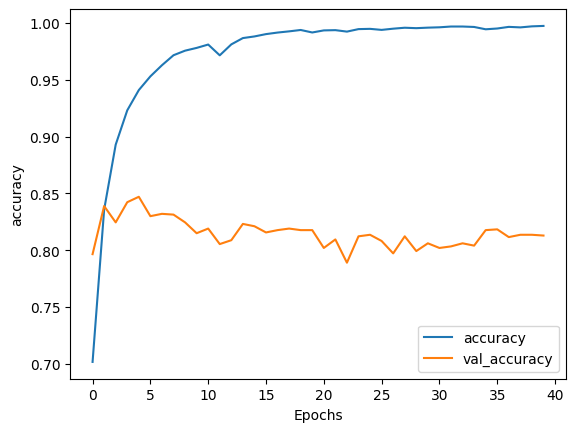

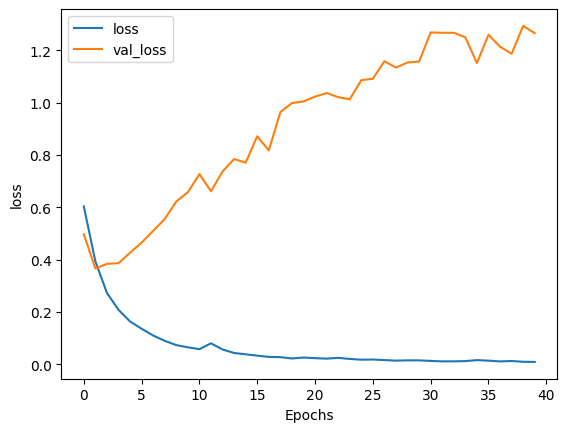

In [33]:
# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

In [34]:
model_lstm.evaluate(testing_padded, testing_labels)

46/46 [==============================] - 0s 8ms/step - loss: 1.2664 - accuracy: 0.8130


[1.266384482383728, 0.8129692673683167]

46/46 [==============================] - 1s 7ms/step


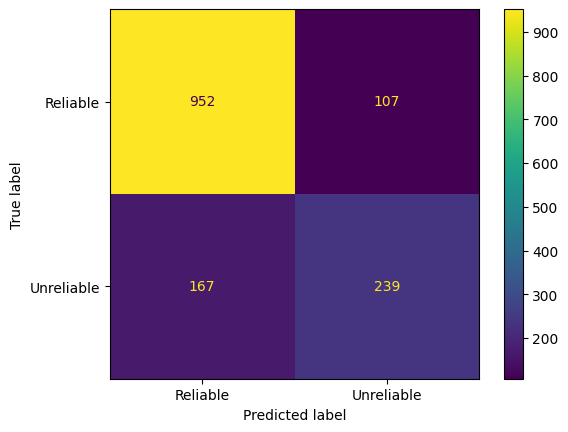

In [35]:
# model_bert.evaluate(Xtest, Ytest)
Ypred = model_lstm.predict(testing_padded)
Ypred = Ypred.flatten()
Ypred = np.round(Ypred)
confus_matrix = confusion_matrix(Ypred, testing_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confus_matrix, display_labels = ['Reliable', 'Unreliable'])
cm_display.plot()
plt.show()

In [36]:
target_names = ['Reliable', 'UnReliable']
print(classification_report(testing_labels, Ypred, target_names=target_names))

              precision    recall  f1-score   support

    Reliable       0.90      0.85      0.87      1119
  UnReliable       0.59      0.69      0.64       346

    accuracy                           0.81      1465
   macro avg       0.74      0.77      0.75      1465
weighted avg       0.83      0.81      0.82      1465



## GRU

The *Gated Recurrent Unit* or [GRU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU) is usually referred to as a simpler version of the LSTM. It can be used in applications where the sequence is important but you want faster results and can sacrifice some accuracy. You will notice in the model summary that it is a bit smaller than the LSTM and it also trains faster by a few seconds.

In [37]:
import tensorflow as tf

# Parameters
embedding_dim = 16
gru_dim = 32
dense_dim = 6

# Model Definition with GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 331, 16)           224000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 233,997
Trainable params: 233,997
Non-trainable params: 0
_________________________________________________________________


In [38]:
NUM_EPOCHS = 40
BATCH_SIZE = 128

# Train the model
history_gru = model_gru.fit(padded, training_labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/40
103/103 [==============================] - 5s 28ms/step - loss: 0.5826 - accuracy: 0.7187 - val_loss: 0.4050 - val_accuracy: 0.8403
Epoch 2/40
103/103 [==============================] - 2s 20ms/step - loss: 0.3752 - accuracy: 0.8447 - val_loss: 0.3736 - val_accuracy: 0.8485
Epoch 3/40
103/103 [==============================] - 2s 20ms/step - loss: 0.2433 - accuracy: 0.9036 - val_loss: 0.3819 - val_accuracy: 0.8498
Epoch 4/40
103/103 [==============================] - 2s 20ms/step - loss: 0.1686 - accuracy: 0.9358 - val_loss: 0.4321 - val_accuracy: 0.8457
Epoch 5/40
103/103 [==============================] - 2s 20ms/step - loss: 0.1209 - accuracy: 0.9551 - val_loss: 0.4920 - val_accuracy: 0.8348
Epoch 6/40
103/103 [==============================] - 2s 21ms/step - loss: 0.0931 - accuracy: 0.9668 - val_loss: 0.6114 - val_accuracy: 0.8177
Epoch 7/40
103/103 [==============================] - 2s 20ms/step - loss: 0.0671 - accuracy: 0.9755 - val_loss: 0.6902 - val_accuracy: 0.8109

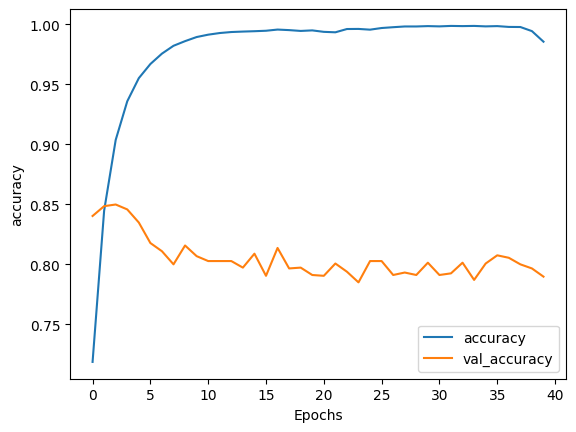

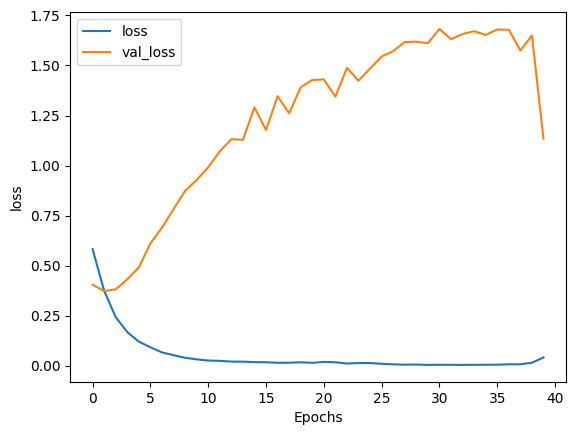

In [39]:
# Plot the accuracy and loss history
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

In [40]:
model_gru.evaluate(testing_padded, testing_labels)

46/46 [==============================] - 0s 8ms/step - loss: 1.1340 - accuracy: 0.7898


[1.1339701414108276, 0.7897610664367676]

46/46 [==============================] - 1s 7ms/step


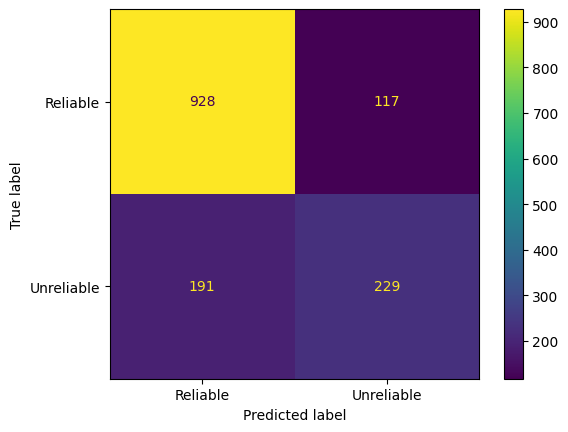

In [41]:
Ypred = model_gru.predict(testing_padded)
Ypred = Ypred.flatten()
Ypred = np.round(Ypred)
confus_matrix = confusion_matrix(Ypred, testing_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confus_matrix, display_labels = ['Reliable', 'Unreliable'])
cm_display.plot()
plt.show()

In [42]:
target_names = ['Reliable', 'UnReliable']
print(classification_report(testing_labels, Ypred, target_names=target_names))

              precision    recall  f1-score   support

    Reliable       0.89      0.83      0.86      1119
  UnReliable       0.55      0.66      0.60       346

    accuracy                           0.79      1465
   macro avg       0.72      0.75      0.73      1465
weighted avg       0.81      0.79      0.80      1465



## Convolution

Lastly, you will use a convolution layer to extract features from your dataset. You will append a [GlobalAveragePooling1d](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling1D) layer to reduce the results before passing it on to the dense layers. Like the model with `Flatten`, this also trains much faster than the ones using RNN layers like `LSTM` and `GRU`.

In [43]:
import tensorflow as tf
# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 331, 16)           224000    
                                                                 
 conv1d (Conv1D)             (None, 327, 128)          10368     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_4 (Dense)             (None, 6)                 774       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 235,149
Trainable params: 235,149
Non-trainable params: 0
________________________________________________

In [44]:
NUM_EPOCHS = 40
# BATCH_SIZE = 128

# Train the model
history_conv = model_conv.fit(padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/40
412/412 [==============================] - 5s 8ms/step - loss: 0.5923 - accuracy: 0.7024 - val_loss: 0.4835 - val_accuracy: 0.7638
Epoch 2/40
412/412 [==============================] - 3s 7ms/step - loss: 0.4688 - accuracy: 0.8072 - val_loss: 0.4149 - val_accuracy: 0.8355
Epoch 3/40
412/412 [==============================] - 3s 7ms/step - loss: 0.3861 - accuracy: 0.8692 - val_loss: 0.3871 - val_accuracy: 0.8444
Epoch 4/40
412/412 [==============================] - 3s 7ms/step - loss: 0.3168 - accuracy: 0.9007 - val_loss: 0.3702 - val_accuracy: 0.8532
Epoch 5/40
412/412 [==============================] - 3s 7ms/step - loss: 0.2656 - accuracy: 0.9218 - val_loss: 0.3655 - val_accuracy: 0.8491
Epoch 6/40
412/412 [==============================] - 3s 7ms/step - loss: 0.2255 - accuracy: 0.9363 - val_loss: 0.3769 - val_accuracy: 0.8587
Epoch 7/40
412/412 [==============================] - 3s 7ms/step - loss: 0.1939 - accuracy: 0.9462 - val_loss: 0.3792 - val_accuracy: 0.8464
Epoch 

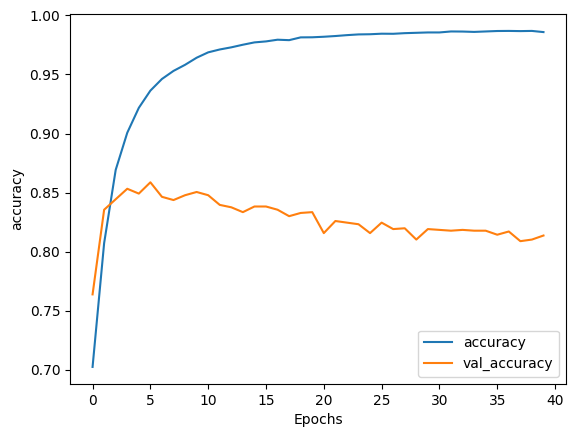

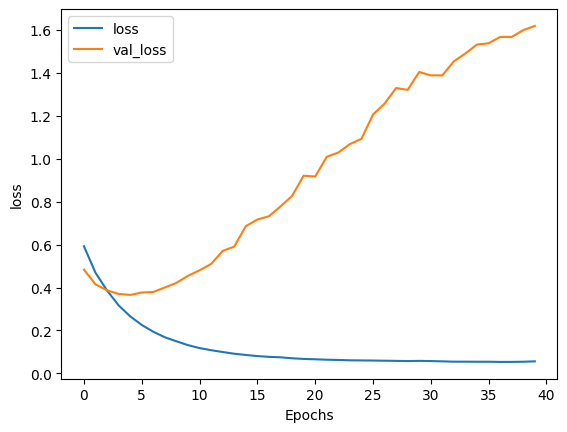

In [45]:
# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')

In [46]:
model_conv.evaluate(testing_padded, testing_labels)

46/46 [==============================] - 0s 2ms/step - loss: 1.6194 - accuracy: 0.8137


[1.619386076927185, 0.8136518597602844]

46/46 [==============================] - 0s 1ms/step


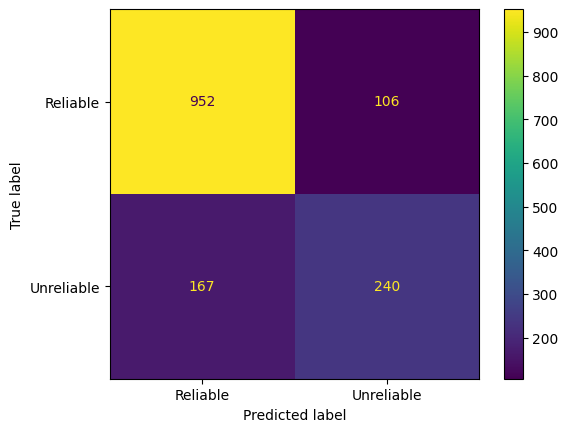

In [47]:
Ypred = model_conv.predict(testing_padded)
Ypred = Ypred.flatten()
Ypred = np.round(Ypred)
confus_matrix = confusion_matrix(Ypred, testing_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confus_matrix, display_labels = ['Reliable', 'Unreliable'])
cm_display.plot()
plt.show()

In [48]:
target_names = ['Reliable', 'UnReliable']
print(classification_report(testing_labels, Ypred, target_names=target_names))

              precision    recall  f1-score   support

    Reliable       0.90      0.85      0.87      1119
  UnReliable       0.59      0.69      0.64       346

    accuracy                           0.81      1465
   macro avg       0.74      0.77      0.76      1465
weighted avg       0.83      0.81      0.82      1465



# LSTM + CNN

In [49]:
#First Half: LSTM > CNN
model_lstm_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(6,return_sequences=True,dropout=0.3, recurrent_dropout=0.0)),
    

    tf.keras.layers.Conv1D(filters=24,kernel_size=2,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(filters=24,kernel_size=3,activation='relu'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv1D(filters=24,kernel_size=5,activation='relu',),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(filters=24,kernel_size=6,activation='relu',),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv1D(filters=12,kernel_size=8,activation='relu',),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv1D(filters=12,kernel_size=4,activation='relu',),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(filters=12,kernel_size=4,activation='relu',),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv1D(filters=12,kernel_size=3,activation='relu',),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(filters=12,kernel_size=3,activation='relu',),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv1D(filters=12,kernel_size=2,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(filters=12,kernel_size=2,activation='relu'),
    tf.keras.layers.Dropout(0.3),


    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(12,return_sequences=True,dropout=0.3, recurrent_dropout=0.0)),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [50]:
model_lstm_cnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_lstm_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 331, 16)           224000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 331, 12)          1104      
 nal)                                                            
                                                                 
 conv1d_1 (Conv1D)           (None, 330, 24)           600       
                                                                 
 dropout (Dropout)           (None, 330, 24)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 328, 24)           1752      
                                                                 
 dropout_1 (Dropout)         (None, 328, 24)           0         
                                                      

In [51]:
NUM_EPOCHS = 40
BATCH_SIZE = 128

# Train the model
history_lstm_cnn = model_lstm_cnn.fit(padded, training_labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/40
103/103 [==============================] - 13s 67ms/step - loss: 0.6169 - accuracy: 0.7004 - val_loss: 0.5607 - val_accuracy: 0.7638
Epoch 2/40
103/103 [==============================] - 6s 55ms/step - loss: 0.6096 - accuracy: 0.7024 - val_loss: 0.5705 - val_accuracy: 0.7638
Epoch 3/40
103/103 [==============================] - 6s 54ms/step - loss: 0.6104 - accuracy: 0.7024 - val_loss: 0.5531 - val_accuracy: 0.7638
Epoch 4/40
103/103 [==============================] - 6s 54ms/step - loss: 0.6104 - accuracy: 0.7024 - val_loss: 0.5537 - val_accuracy: 0.7638
Epoch 5/40
103/103 [==============================] - 5s 53ms/step - loss: 0.6103 - accuracy: 0.7024 - val_loss: 0.5640 - val_accuracy: 0.7638
Epoch 6/40
103/103 [==============================] - 6s 54ms/step - loss: 0.4994 - accuracy: 0.7599 - val_loss: 0.4494 - val_accuracy: 0.7802
Epoch 7/40
103/103 [==============================] - 5s 53ms/step - loss: 0.3678 - accuracy: 0.8507 - val_loss: 0.4958 - val_accuracy: 0.817

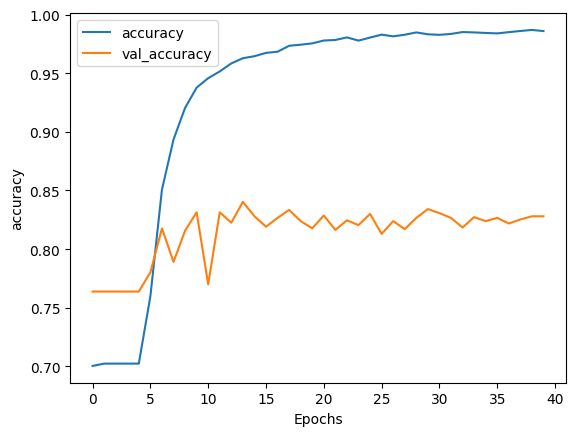

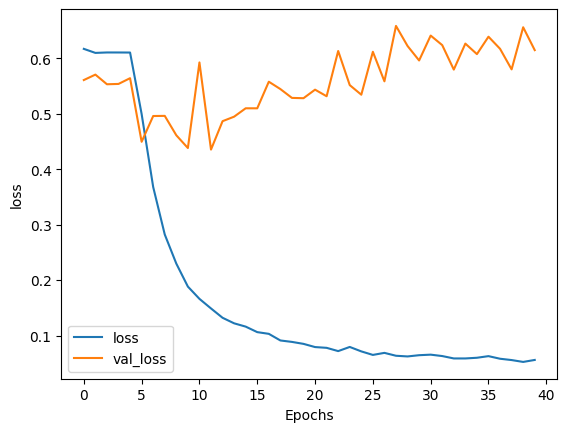

In [52]:
# Plot the accuracy and loss history
plot_graphs(history_lstm_cnn, 'accuracy')
plot_graphs(history_lstm_cnn, 'loss')

In [53]:
model_lstm_cnn.evaluate(testing_padded, testing_labels)

46/46 [==============================] - 1s 16ms/step - loss: 0.6146 - accuracy: 0.8280


[0.6146066188812256, 0.8279863595962524]

46/46 [==============================] - 2s 14ms/step


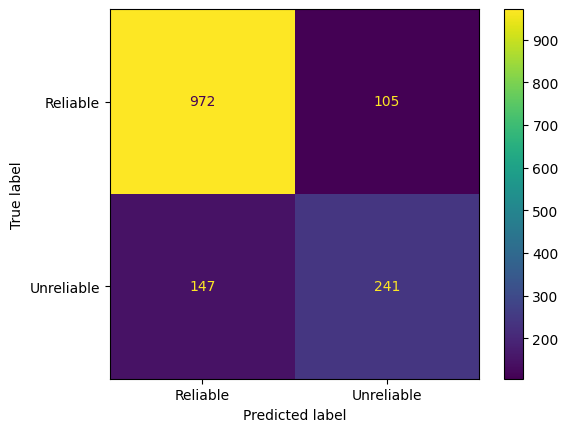

In [54]:
Ypred = model_lstm_cnn.predict(testing_padded)
Ypred = Ypred.flatten()
Ypred = np.round(Ypred)
confus_matrix = confusion_matrix(Ypred, testing_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confus_matrix, display_labels = ['Reliable', 'Unreliable'])
cm_display.plot()
plt.show()

In [55]:
target_names = ['Reliable', 'UnReliable']
print(classification_report(testing_labels, Ypred, target_names=target_names))

              precision    recall  f1-score   support

    Reliable       0.90      0.87      0.89      1119
  UnReliable       0.62      0.70      0.66       346

    accuracy                           0.83      1465
   macro avg       0.76      0.78      0.77      1465
weighted avg       0.84      0.83      0.83      1465



## Extra Things

In [56]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model_lstm.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape) 


import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
i = 1
# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size-1):
    print("Count: ", i)
    word_name = reverse_word_index[word_num]
    word_embedding = embedding_weights[word_num]
#     out_m.write(word_name + "\n")
    print(out_m.write(word_name + "\n"))
    i = i + 1
    if (i == 14000):
        break
    print(out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n"))
    
#         out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")
# Close the files
out_v.close()
out_m.close()

# reverse_word_index.shape

# # Import files utilities in Colab
# try:
#   from google.colab import files
# except ImportError:
#   pass

# # Download the files
# else:
#   files.download('vecs.tsv')
#   files.download('meta.tsv')



(14000, 16)
Count:  1
6
194
Count:  2
7
202
Count:  3
5
196
Count:  4
6
197
Count:  5
3
197
Count:  6
5
197
Count:  7
4
199
Count:  8
5
197
Count:  9
3
202
Count:  10
4
199
Count:  11
3
207
Count:  12
5
193
Count:  13
4
202
Count:  14
8
195
Count:  15
12
192
Count:  16
6
198
Count:  17
6
197
Count:  18
3
201
Count:  19
3
200
Count:  20
5
190
Count:  21
5
203
Count:  22
5
190
Count:  23
4
193
Count:  24
3
197
Count:  25
4
196
Count:  26
6
192
Count:  27
5
192
Count:  28
8
199
Count:  29
2
200
Count:  30
4
194
Count:  31
8
204
Count:  32
6
196
Count:  33
7
202
Count:  34
5
201
Count:  35
6
200
Count:  36
5
191
Count:  37
4
188
Count:  38
4
193
Count:  39
4
188
Count:  40
8
194
Count:  41
6
210
Count:  42
6
195
Count:  43
2
197
Count:  44
8
199
Count:  45
5
200
Count:  46
5
197
Count:  47
3
198
Count:  48
5
197
Count:  49
10
198
Count:  50
5
186
Count:  51
11
193
Count:  52
8
199
Count:  53
12
193
Count:  54
5
198
Count:  55
13
196
Count:  56
6
200
Count:  57
5
201
Count:  58
5
192
Count:

199
Count:  1885
6
184
Count:  1886
5
195
Count:  1887
7
185
Count:  1888
8
194
Count:  1889
8
197
Count:  1890
3
196
Count:  1891
7
191
Count:  1892
11
197
Count:  1893
8
193
Count:  1894
5
198
Count:  1895
10
201
Count:  1896
6
194
Count:  1897
11
178
Count:  1898
7
195
Count:  1899
7
191
Count:  1900
11
194
Count:  1901
7
204
Count:  1902
6
202
Count:  1903
9
199
Count:  1904
5
195
Count:  1905
10
196
Count:  1906
9
198
Count:  1907
7
195
Count:  1908
9
194
Count:  1909
11
193
Count:  1910
3
198
Count:  1911
7
200
Count:  1912
6
189
Count:  1913
5
180
Count:  1914
6
185
Count:  1915
11
204
Count:  1916
8
190
Count:  1917
4
199
Count:  1918
2
186
Count:  1919
9
189
Count:  1920
8
201
Count:  1921
8
191
Count:  1922
4
191
Count:  1923
5
191
Count:  1924
5
194
Count:  1925
9
199
Count:  1926
10
194
Count:  1927
7
190
Count:  1928
10
187
Count:  1929
6
183
Count:  1930
6
201
Count:  1931
5
198
Count:  1932
8
188
Count:  1933
10
193
Count:  1934
12
179
Count:  1935
6
194
Count:  1936
8
2

186
Count:  8945
7
197
Count:  8946
4
180
Count:  8947
9
184
Count:  8948
7
186
Count:  8949
7
193
Count:  8950
7
193
Count:  8951
5
191
Count:  8952
11
186
Count:  8953
8
190
Count:  8954
5
203
Count:  8955
16
190
Count:  8956
9
187
Count:  8957
8
181
Count:  8958
9
204
Count:  8959
13
194
Count:  8960
13
182
Count:  8961
6
194
Count:  8962
7
193
Count:  8963
11
180
Count:  8964
6
185
Count:  8965
6
194
Count:  8966
18
194
Count:  8967
12
189
Count:  8968
6
191
Count:  8969
7
191
Count:  8970
9
184
Count:  8971
4
187
Count:  8972
7
188
Count:  8973
8
190
Count:  8974
16
183
Count:  8975
5
191
Count:  8976
8
191
Count:  8977
7
190
Count:  8978
6
192
Count:  8979
10
191
Count:  8980
15
192
Count:  8981
6
203
Count:  8982
10
188
Count:  8983
12
186
Count:  8984
5
187
Count:  8985
8
186
Count:  8986
14
187
Count:  8987
8
185
Count:  8988
8
197
Count:  8989
10
187
Count:  8990
8
193
Count:  8991
10
186
Count:  8992
9
184
Count:  8993
6
187
Count:  8994
7
188
Count:  8995
9
188
Count:  8996

192
Count:  12549
6
190
Count:  12550
5
195
Count:  12551
10
196
Count:  12552
11
200
Count:  12553
11
179
Count:  12554
9
200
Count:  12555
9
197
Count:  12556
8
192
Count:  12557
12
180
Count:  12558
6
179
Count:  12559
8
183
Count:  12560
8
192
Count:  12561
3
193
Count:  12562
8
190
Count:  12563
9
187
Count:  12564
7
196
Count:  12565
7
196
Count:  12566
13
191
Count:  12567
9
196
Count:  12568
16
194
Count:  12569
8
190
Count:  12570
7
191
Count:  12571
10
187
Count:  12572
8
192
Count:  12573
12
188
Count:  12574
9
202
Count:  12575
11
185
Count:  12576
5
187
Count:  12577
7
182
Count:  12578
16
183
Count:  12579
9
188
Count:  12580
9
192
Count:  12581
10
193
Count:  12582
5
192
Count:  12583
8
197
Count:  12584
7
184
Count:  12585
6
184
Count:  12586
9
196
Count:  12587
11
194
Count:  12588
10
196
Count:  12589
8
197
Count:  12590
11
198
Count:  12591
12
196
Count:  12592
5
198
Count:  12593
7
200
Count:  12594
8
202
Count:  12595
8
193
Count:  12596
14
198
Count:  12597
10
195

In [57]:
# model_lstm.save("./NLP/Model.h5",save_format="h5")
# model_gru.save("./NLP/Model_gru.h5",save_format="h5")
# model_conv.save("./NLP/Model_conv.h5",save_format="h5")
# model_lstm_cnn.save("./NLP/Model_conv_lstm.h5",save_format="h5")

In [58]:
# restored_keras_model = tf.keras.models.load_model("./NLP/Model.h5")
# text = ["newly released fda doc reveals deaths of 6 pa during pfizer ' s covid - 19 vaccine trials . acc to one pa after second shot , he woke up with chills , shaking so hard he cracked a tooth . ' it hurt to even just lay in my bed sheet ,' he said ."]

# # Generate the word index dictionary
# tokenizer.fit_on_texts(text)

# # Print the length of the word index
# # word_index = tokenizer.word_index
# # print(f'number of words in word_index: {len(word_index)}')

# # Print the word index
# # print(f'word_index: {word_index}')
# # print()

# # Generate and pad the sequences
# seq1 = tokenizer.texts_to_sequences(text)
# pad = pad_sequences(seq1,maxlen=331, truncating='post')

# index = 0
# print(f'Tweet: {seq1[index]}')
# print(f'padded sequence: {pad[index]}')
# print()

# # Print dimensions of padded sequences
# print(f'shape of padded sequences: {pad.shape}')
# # print(f'padded sequence: {testing_padded[index]}')

# pred = restored_keras_model.predict(pad)
# labels = ['reliable','unreliable']
# print(pred, labels[np.argmax(pred)])